In [152]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [153]:
#Producing dataset
X,y = make_regression(n_samples=500, n_features=10,n_informative=5,noise=2, random_state=0)
n_features = X.shape[1]

In [154]:
#Normalizing dataset
def normalize(X):
    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    
    return (X - mean)/std

In [155]:
X = normalize(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


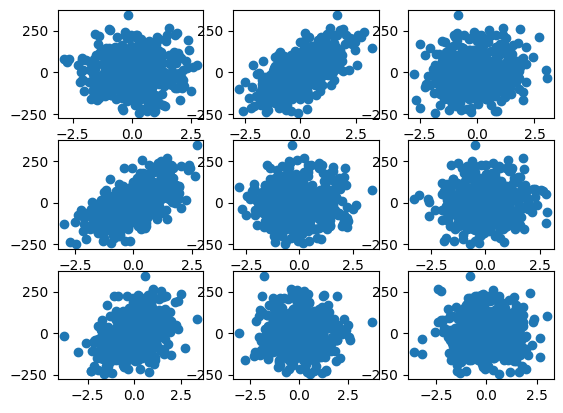

In [156]:
#Visualizing y as function of X[f]
for f in range(0,9):
    plt.subplot(3,3,f+1)
    plt.scatter(X[:,f],y)
plt.show()

In [157]:
#Train-Test split
XT, Xt,yT,yt = train_test_split(X,y,test_size=0.3,shuffle=False,random_state=0)

In [158]:
#Add dummy column to X
def column(X):
    if X.shape[1] == n_features:
        m = X.shape[0]
        ones = np.ones((m,1))
        X = np.hstack((ones,X))
    return X
X = column(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,1.0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,1.0,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,1.0,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,1.0,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [159]:
#Gradient
def hypothesis(X,theta):
    return np.dot(X,theta)

def loss(X,y,theta):
    yp = hypothesis(X,theta)
    error = np.mean((y-yp)**2)
    return error 

def gradient(X,y,theta):
    yp = hypothesis(X,theta)
    grad = np.dot(X.T,(yp-y))
    m = X.shape[0]
    return grad/m

In [160]:
def train(X,y,learning_rate=0.1,max_iters=100):
    n = X.shape[1] 
    theta = np.random.randn(n)
    error_list = []

    for i in range(max_iters):
        e = loss(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad 

    plt.plot(error_list)
    return theta 

In [161]:
XT = column(XT)
Xt = column(Xt)
print(XT.shape,Xt.shape)


(350, 11) (150, 11)


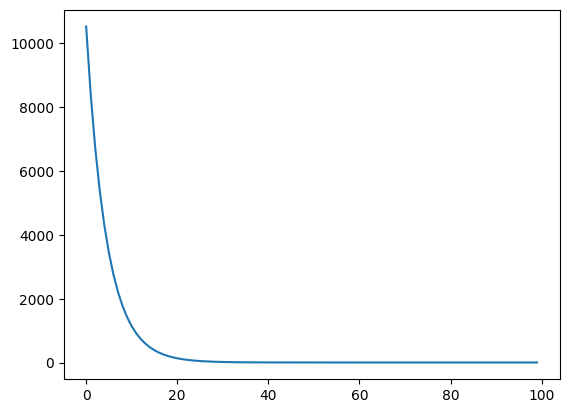

In [170]:
n = XT.shape[1]
theta = train(XT,yT)

In [189]:
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y - ymean)**2)
    return (1 - num/denom)*100 

In [190]:
yp = hypothesis(Xt,theta)

In [191]:
r2Score(yt,yp)


99.95694525330401